In [4]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [5]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [6]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [7]:
content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

196608/195196 [==============================] - 0s 0us/step


In [8]:
def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

In [9]:
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)

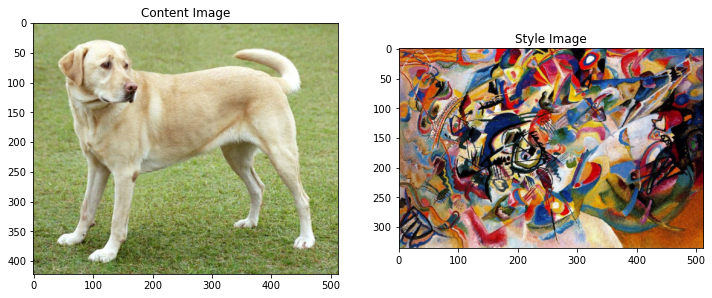

In [10]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

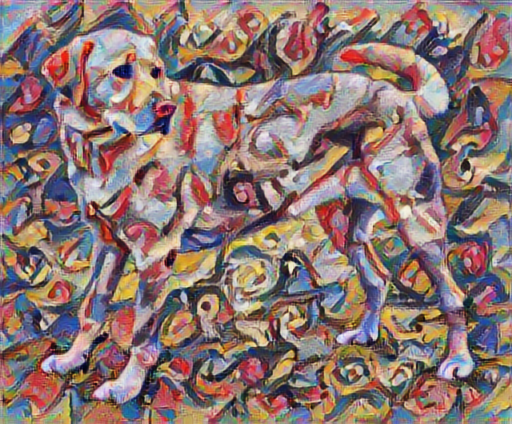

In [13]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

In [154]:
from PIL import Image
import torch
import torchvision.transforms as transforms

def modify_img(img):
    image = Image.open(img).convert('RGB')
    image = image.resize((200,200), Image.ANTIALIAS)
    image = transforms.ToTensor()(image).unsqueeze_(0)
    image = image.view(1,200,200,3)
    return image.to(torch.float)



In [157]:
import cv2
def cv2_modify(img):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-157-17bd8845ca46>, line 3)

In [155]:
source = modify_img("images/pm1.jpg")
style = modify_img("images/wheat_field.jpg")
final = hub_model(tf.constant(source), tf.constant(style))[0]

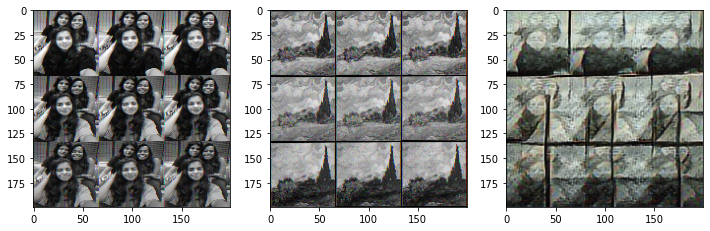

In [156]:
plt.subplot(1, 3, 1)
plt.imshow(np.squeeze(source))

plt.subplot(1, 3, 2)
plt.imshow(np.squeeze(style))

plt.subplot(1, 3, 3)
plt.imshow(np.squeeze(final))

In [133]:
def load_img(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, (224, 224))
    img = img[tf.newaxis, :]
    return img

In [134]:
source = load_img("images/pm1.jpg")
style = load_img("images/wheat_field.jpg")
final = hub_model(tf.constant(source), tf.constant(style))[0]

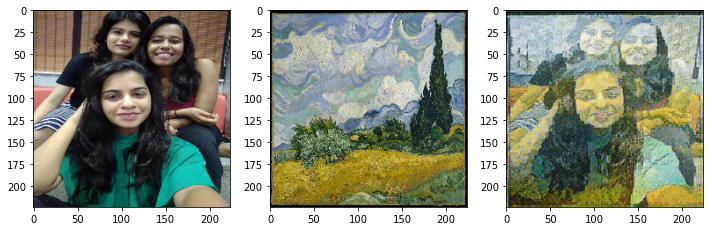

In [153]:
plt.subplot(1, 3, 1)
plt.imshow(np.squeeze(source))

plt.subplot(1, 3, 2)
plt.imshow(np.squeeze(style))

plt.subplot(1, 3, 3)
plt.imshow(np.squeeze(final))